# Linear Regression at Codecademy Project

Import the libraries

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

We’re imagining that this data was collected as part of an experiment to understand factors that contribute to learner performance on a quiz.
Read in the data

In [2]:
codecademy = pd.read_csv('codecademy.csv')

Print the first five rows

In [3]:
print(codecademy.head(5)) #Score, completed (number of other content items), lesson (which lesson the learner took)

   score  completed    lesson
0   82.7       35.0  Lesson A
1   65.2       31.0  Lesson A
2   55.3       33.0  Lesson A
3   28.8       25.0  Lesson B
4   31.2       18.0  Lesson B


Model the relationship between quiz score and number of completed content items. Create a scatter plot of score vs completed

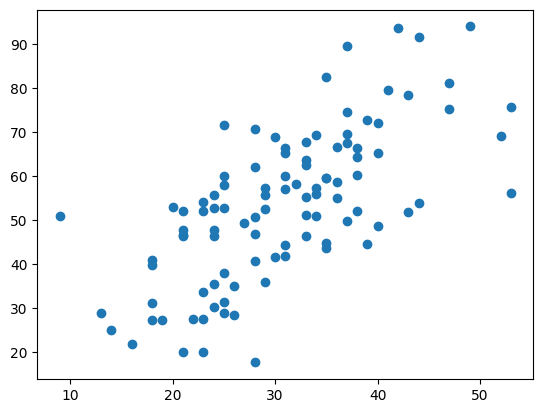

<Figure size 640x480 with 0 Axes>

In [4]:
plt.scatter(codecademy.completed, codecademy.score)
plt.show()
plt.clf()

Fit a linear regression to predict score based on prior lessons completed

In [5]:
model = sm.OLS.from_formula("score ~ completed", codecademy)
fit = model.fit()
print(fit.params)

# Intercept interpretation:
# A learner who has previously completed 0 content items is expected to earn a quiz score of 13.2 points.

# Slope interpretation:
# Students who have completed one additional prior content item are expected to score 1.3 points higher on the quiz.

Intercept    13.214113
completed     1.306826
dtype: float64


Plot the scatter plot with the line on top

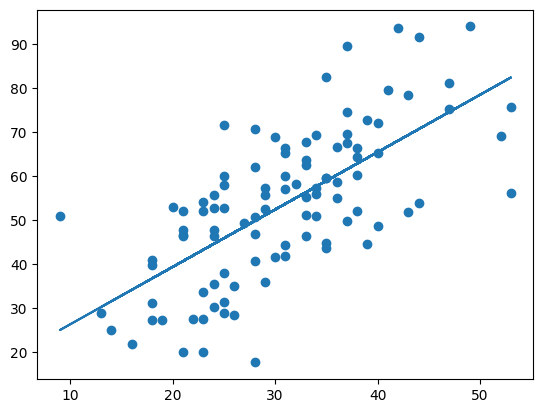

<Figure size 640x480 with 0 Axes>

In [6]:
plt.scatter(codecademy.completed, codecademy.score)
plt.plot(codecademy.completed, fit.predict(codecademy))
plt.show()
plt.clf()

Predict score for learner who has completed 20 prior lessons

In [7]:
data = {'completed':[20]} #IMPORTANTE: el valor ingresado debe corresponder a la key
#de la columna con la cual se hace la predicción.
prediction = fit.predict(data)
print(prediction) #39.35

0    39.350625
dtype: float64


Calculate fitted values

In [8]:
fitted_values = fit.predict(codecademy)
print(fitted_values.head(5))

0    58.953009
1    53.725706
2    56.339358
3    45.884753
4    36.736974
dtype: float64


Calculate residuals

In [9]:
residuals = codecademy.score - fitted_values 

Check normality assumption

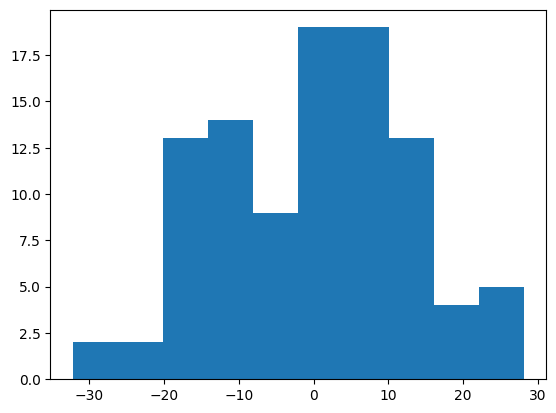

<Figure size 640x480 with 0 Axes>

In [10]:
plt.hist(residuals)
plt.show()
plt.clf() #No es normal

Check homoscedasticity assumption

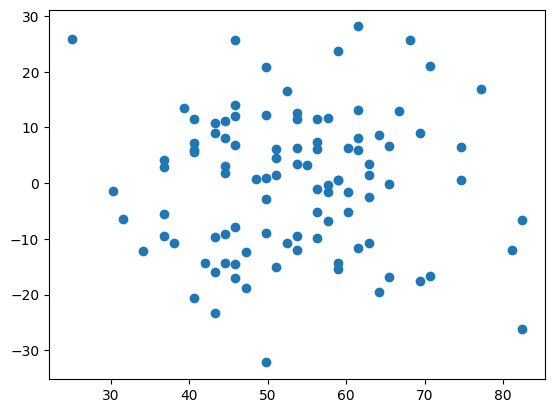

<Figure size 640x480 with 0 Axes>

In [11]:
plt.scatter(fitted_values, residuals)
plt.show()
plt.clf() #Cumple, ya que los datos parecen distribuidos de forma aleatoria; forma no definida.

Do learners who take lesson A or B perform better on the quiz? Create a boxplot of score vs lesson

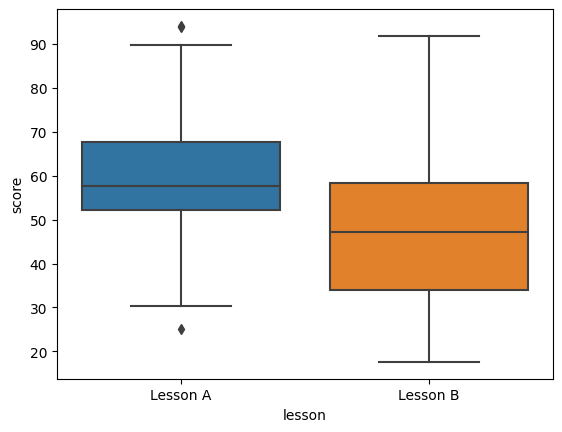

<Figure size 640x480 with 0 Axes>

In [12]:
sns.boxplot(x = 'lesson', y = 'score', data = codecademy)
plt.show()
plt.clf() #A

Fit a linear regression to predict score based on which lesson they took

In [13]:
model = sm.OLS.from_formula("score ~ lesson", codecademy)
fit = model.fit()
print(fit.params) #59.22; -11.64

Intercept             59.220
lesson[T.Lesson B]   -11.642
dtype: float64


Calculate and print the group means and mean difference (for comparison)

In [14]:
mean_a = np.mean(codecademy.score[codecademy.lesson == 'Lesson A'])
print(mean_a) #59.22
mean_b = np.mean(codecademy.score[codecademy.lesson == 'Lesson B'])
print(mean_b)

print('Mean score difference: ', mean_a - mean_b) #11.64

#print(codecademy.groupby('lesson').mean().score); versión alternativa

59.220000000000006
47.578
Mean score difference:  11.642000000000003


Use `sns.lmplot()` to plot `score` vs. `completed` colored by `lesson`

c:\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


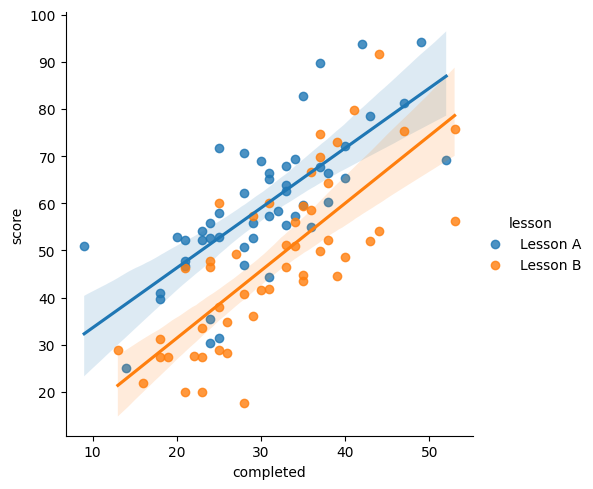

In [15]:
sns.lmplot(x = 'completed', y = 'score', hue = 'lesson', data = codecademy)
plt.show()